<a href="https://colab.research.google.com/github/subramanian72/Industrial-Copper-Project/blob/main/IndCopperPrj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Industrial Copper Model Project***

In [1]:
# Libraries imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Copper_Set.xlsx', sheet_name=0)

In [3]:
df.shape

(181673, 14)

In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
df['status'].value_counts()

Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [8]:
#drop the status values other than Won and Lost

indexAge = df[ (df['status'] != 'Won') & (df['status'] != 'Lost') ].index
df.drop(indexAge , inplace=True)
df.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,20210101.0,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,20210701.0,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00
11,CA076845-2EDE-4C02-95BE-6C7B842026E8,20210401.0,113.995666,30342192.0,32.0,Won,W,41.0,0.55,1220.0,0000000000000000000000000000000001000063,611993,20210101.0,954.00


In [9]:
df.shape

(150448, 14)

In [10]:
df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [11]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [12]:
df.isnull().sum()

id                   1
item_date            1
quantity tons        0
customer             1
country              4
status               0
item type            0
application          3
thickness            0
width                0
material_ref     62799
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [13]:
df.drop('material_ref', 1, inplace=True)

<ipython-input-13-e6a00f15702a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('material_ref', 1, inplace=True)


In [14]:
df.isnull().sum()

id               1
item_date        1
quantity tons    0
customer         1
country          4
status           0
item type        0
application      3
thickness        0
width            0
product_ref      0
delivery date    1
selling_price    1
dtype: int64

In [15]:
df = df.drop(['item_date','delivery date'], axis='columns')

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

id               0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [18]:
df.head()

,id,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00


In [19]:
df.drop('id', 1, inplace=True)

<ipython-input-19-b82a3da1a97c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('id', 1, inplace=True)


In [20]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [21]:
df.head(5)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150441 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150441 non-null  object 
 1   customer       150441 non-null  float64
 2   country        150441 non-null  float64
 3   status         150441 non-null  object 
 4   item type      150441 non-null  object 
 5   application    150441 non-null  float64
 6   thickness      150441 non-null  float64
 7   width          150441 non-null  float64
 8   product_ref    150441 non-null  int64  
 9   selling_price  150441 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 12.6+ MB


In [23]:
df.describe()

,customer,country,application,thickness,width,product_ref,selling_price
count,1.504410e+05,150441.000000,150441.000000,150441.000000,150441.000000,1.504410e+05,150441.000000
mean,3.023288e+07,45.391024,25.195153,2.618268,1297.839528,4.748499e+08,825.767938
std,1.056096e+05,24.488224,17.640200,7.115567,266.159596,7.172674e+08,290.884094
min,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1160.000000
25%,3.019689e+07,26.000000,10.000000,0.740000,1176.000000,6.283770e+05,671.000000
50%,3.020531e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,811.000000
75%,3.027982e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,951.000000
max,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,81236.140000


<ipython-input-24-5fae30ba4060>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cbar=False,cmap='RdBu')
<ipython-input-24-5fae30ba4060>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customer,country,application,thickness,width,product_ref,selling_price
customer,1.000000,0.089505,0.011591,0.032566,0.044292,-0.034341,-0.005210
country,0.089505,1.000000,-0.035613,-0.016237,0.057064,-0.152604,-0.010706
application,0.011591,-0.035613,1.000000,-0.057480,-0.213284,-0.116566,0.108737
thickness,0.032566,-0.016237,-0.057480,1.000000,0.149315,0.036788,-0.099327
width,0.044292,0.057064,-0.213284,0.149315,1.000000,-0.041616,-0.123258
product_ref,-0.034341,-0.152604,-0.116566,0.036788,-0.041616,1.000000,-0.071425
selling_price,-0.005210,-0.010706,0.108737,-0.099327,-0.123258,-0.071425,1.000000


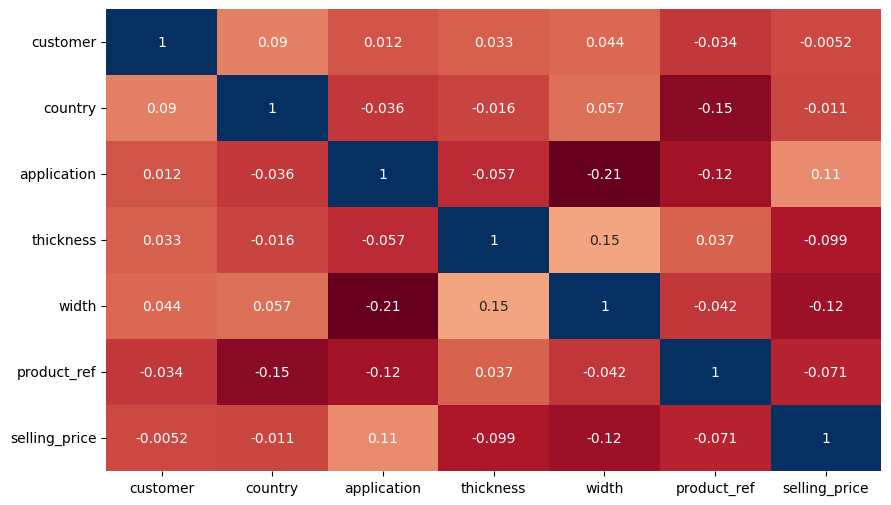

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cbar=False,cmap='RdBu')
df.corr()

<Axes: ylabel='selling_price'>

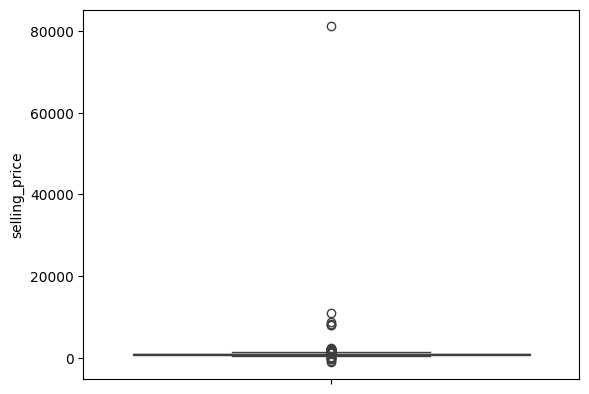

In [24]:
#to find outliers

sns.boxplot(df['selling_price'])

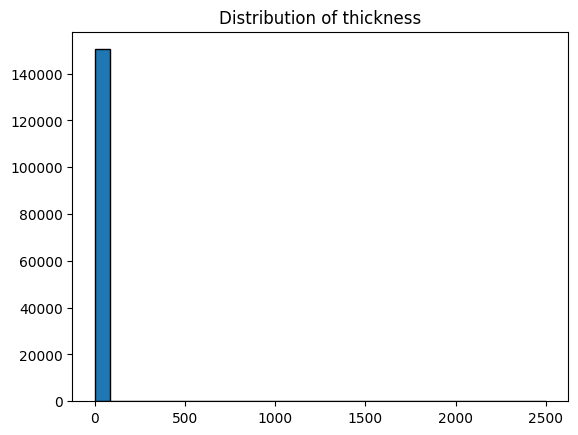

In [30]:
plt.hist(df['thickness'], bins=30, edgecolor='black')
plt.title('Distribution of thickness')
plt.show()

In [26]:
df['thickness'].value_counts()

2.00     11273
3.00     11219
1.50      9779
0.50      9138
1.00      7881
         ...  
9.39         1
15.66        1
7.53         1
4.52         1
15.60        1
Name: thickness, Length: 569, dtype: int64

In [31]:
df['width'].value_counts()

1250.0    31219
1500.0    27715
1000.0    10458
2000.0     6647
1220.0     4411
          ...  
234.0         1
903.0         1
1921.0        1
1751.0        1
1786.0        1
Name: width, Length: 1347, dtype: int64

In [32]:
df['selling_price'].value_counts()

821.00     333
811.00     327
812.00     324
816.00     324
832.00     323
          ... 
752.89       1
1223.63      1
846.01       1
822.88       1
859.50       1
Name: selling_price, Length: 8943, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150441 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150441 non-null  object 
 1   customer       150441 non-null  float64
 2   country        150441 non-null  float64
 3   status         150441 non-null  object 
 4   item type      150441 non-null  object 
 5   application    150441 non-null  float64
 6   thickness      150441 non-null  float64
 7   width          150441 non-null  float64
 8   product_ref    150441 non-null  int64  
 9   selling_price  150441 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 12.6+ MB


In [26]:
# df['quantity tons'].head(10)
df = df[df['quantity tons'] != 'e']

In [27]:
df['quantity tons'] = df['quantity tons'].astype(float)
# df['quantity tons']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150440 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150440 non-null  float64
 1   customer       150440 non-null  float64
 2   country        150440 non-null  float64
 3   status         150440 non-null  object 
 4   item type      150440 non-null  object 
 5   application    150440 non-null  float64
 6   thickness      150440 non-null  float64
 7   width          150440 non-null  float64
 8   product_ref    150440 non-null  int64  
 9   selling_price  150440 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.6+ MB


In [30]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['status', 'item type'], dtype='object')


In [31]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150440 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150440 non-null  float64
 1   customer       150440 non-null  float64
 2   country        150440 non-null  float64
 3   status         150440 non-null  int64  
 4   item type      150440 non-null  int64  
 5   application    150440 non-null  float64
 6   thickness      150440 non-null  float64
 7   width          150440 non-null  float64
 8   product_ref    150440 non-null  int64  
 9   selling_price  150440 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 12.6 MB
None


In [32]:
df['item type'].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [33]:
df.head(10)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,1,5,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,1,5,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,1,6,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,1,3,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,1,5,10.0,4.00,2000.0,640665,577.00
5,225.790676,30202938.0,25.0,1,5,41.0,1.50,1265.0,1668701718,983.00
7,113.387124,30342192.0,32.0,1,5,41.0,0.68,1220.0,611993,931.00
8,69.071853,30341428.0,38.0,1,3,10.0,0.60,1275.0,1668701376,1363.00
9,630.626917,30202938.0,25.0,1,5,41.0,1.50,1165.0,1668701718,983.00
11,113.995666,30342192.0,32.0,1,5,41.0,0.55,1220.0,611993,954.00


In [34]:
df.shape

(150440, 10)

In [36]:
df.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
count,150440.000000,1.504400e+05,150440.000000,150440.000000,150440.000000,150440.000000,150440.000000,150440.000000,1.504400e+05,150440.000000
mean,94.450248,3.023288e+07,45.390807,0.771118,4.192342,25.195048,2.618282,1297.841508,4.748519e+08,825.768961
std,440.942220,1.056098e+05,24.488161,0.420114,1.049149,17.640212,7.115589,266.159373,7.172694e+08,290.884790
min,-2000.000000,1.245800e+04,25.000000,0.000000,0.000000,2.000000,0.180000,1.000000,6.117280e+05,-1160.000000
25%,10.697445,3.019689e+07,26.000000,1.000000,3.000000,10.000000,0.740000,1176.000000,6.283770e+05,671.000000
50%,29.934445,3.020531e+07,30.000000,1.000000,5.000000,15.000000,1.500000,1250.000000,6.406650e+05,811.000000
75%,64.866456,3.027982e+07,78.000000,1.000000,5.000000,41.000000,3.000000,1500.000000,1.332077e+09,951.000000
max,70252.363068,3.040818e+07,113.000000,1.000000,6.000000,99.000000,2500.000000,2990.000000,1.722208e+09,81236.140000


In [37]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df.drop(['status','selling_price'], axis=1)
y = df['selling_price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse_lr)
print("Mean absolute error:", mae_lr)
print("R2 Score:", r2_lr)

Mean Squared Error: 36059.180025176625
Mean absolute error: 153.04542995115497
R2 Score: 0.08391618501740195


In [38]:
_#Random forest regressor

from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(random_state=0, n_estimators=10)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse_rf}')

mae_rf = mean_absolute_error(y_test, predictions)
print(f'Mean Absoulte Error: {mae_rf}')

r2_rf = r2_score(y_test, predictions)
print(f'R-squared: {r2_rf}')

Mean Squared Error: 102647.14232815374
Mean Absoulte Error: 96.94984655011964
R-squared: -1.60775163704173


In [39]:
#Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor


dtr=DecisionTreeRegressor(max_depth=3, random_state=42)

dtr.fit(X_train,y_train)

pred = dtr.predict(X_test)

# evaluate the model on training sample
mse_dt = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse_dt}')

mae_dt = mean_absolute_error(y_test, pred)
print(f'Mean Absoulte Error: {mae_dt}')

R2_Score_dt = r2_score(y_test, pred)
print("R2 score:" , R2_Score_dt)

Mean Squared Error: 26980.20332753338
Mean Absoulte Error: 132.1716685422343
R2 score: 0.31456767524840845


# Regression Models and final result

In [40]:
scores_ = [("Random Forest", mse_rf, mae_rf, r2_rf),
("Linear Regression",  mse_lr, mae_lr, r2_lr),
         ("Decision Tree", mse_dt, mae_dt, R2_Score_dt)  ]

Scores =pd.DataFrame(data = scores_, columns=['Model Name', 'Mean square error', 'Mean absolute error', 'R2 Score'])
Scores.set_index('Model Name', inplace = True)

Scores

,Mean square error,Mean absolute error,R2 Score
Model Name,,,
Random Forest,102647.142328,96.949847,-1.607752
Linear Regression,36059.180025,153.045430,0.083916
Decision Tree,26980.203328,132.171669,0.314568


In [78]:
# save the model to disk
import joblib

joblib.dump(regressor, "regg_rf_model.sav")

['regg_rf_model.sav']

In [79]:
def predict_regg(data):
    regg_rf_classifier = joblib.load("regg_rf_model.sav")
    return regg_rf_classifier.predict(data)

In [45]:
X_train

,quantity tons,customer,country,item type,application,thickness,width,product_ref
21700,453.515640,30198408.0,25.0,2,10.0,6.00,1516.0,1670798778
101096,62.719920,30148849.0,32.0,5,27.0,2.68,1337.0,1670798778
125961,100.696522,30197265.0,26.0,3,10.0,10.00,1500.0,1671863738
58556,59.526757,30268656.0,79.0,3,15.0,0.50,1210.0,628377
158096,27.576191,30201846.0,25.0,3,10.0,2.00,1500.0,1668701718
...,...,...,...,...,...,...,...,...
144863,6.032985,30196884.0,84.0,5,10.0,3.00,1233.0,164141591
125067,30.607638,30267268.0,28.0,5,41.0,0.43,1105.0,611993
159322,61.170547,30206248.0,26.0,3,15.0,5.00,1500.0,1670798778
177726,81.344679,30161088.0,78.0,5,10.0,1.20,1500.0,628377


In [46]:
y_train

21700     872.00
101096    657.00
125961    719.00
58556     917.00
158096    589.00
           ...  
144863    709.27
125067    840.00
159322    590.00
177726    529.00
147380    755.00
Name: selling_price, Length: 120352, dtype: float64

In [81]:
#To verify the regression model
result_regg = predict_regg(np.array([[453.515640,	30198408.0,	25.0,	2,	10.0,	6.00,	1516.0,	1670798778]]))

print("The price is :", round(result_regg[0],2))

# if result_regg[0] == 1:
#   print('Won')
# else:
#   print('Loss')

The price is : 823.2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#Classification models



In [45]:
#Decision tree classifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

X = df.drop(['status','selling_price'], axis=1)
y = df['status']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(random_state=0)
# train the model
dt.fit(X_train, y_train)
# make predictions
dt_pred = dt.predict(X_test)
# print the accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree Classifier: ",
      accuracy_score(y_test, dt_pred))
# print other performance metrics
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1score = f1_score(y_test, dt_pred, average='weighted')
print("Precision of Decision Tree Classifier: ",
      precision_score(y_test, dt_pred, average='weighted'))
print("Recall of Decision Tree Classifier: ",
      recall_score(y_test, dt_pred, average='weighted'))
print("F1-Score of Decision Tree Classifier: ",
      f1_score(y_test, dt_pred, average='weighted'))

Accuracy of Decision Tree Classifier:  0.8926482318532305
Precision of Decision Tree Classifier:  0.8923813713406747
Recall of Decision Tree Classifier:  0.8926482318532305
F1-Score of Decision Tree Classifier:  0.8925116550145514


In [46]:
# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()
# train the model
gnb.fit(X_train, y_train)
# make predictions
gnb_pred = gnb.predict(X_test)
# print the accuracy

gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Accuracy of Gaussian Naive Bayes: ",
      accuracy_score(y_test, gnb_pred))
# print other performance metrics
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_f1score = f1_score(y_test, gnb_pred, average='weighted')
print("Precision of Gaussian Naive Bayes: ",
      precision_score(y_test, gnb_pred, average='weighted'))
print("Recall of Gaussian Naive Bayes: ",
      recall_score(y_test, gnb_pred, average='weighted'))
print("F1-Score of Gaussian Naive Bayes: ",
      f1_score(y_test, gnb_pred, average='weighted'))

Accuracy of Gaussian Naive Bayes:  0.765388194629088
Precision of Gaussian Naive Bayes:  0.6822892795153511
Recall of Gaussian Naive Bayes:  0.765388194629088
F1-Score of Gaussian Naive Bayes:  0.67967033123227


In [47]:
# Random forest classifer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

rf_precision = precision_score(y_test, y_pred)
print("Precision: ", rf_precision)

rf_recall = recall_score(y_test, y_pred)
print("Recall: ", rf_recall)

rf_f1score = f1_score(y_test, y_pred)
print("F1Score: ", rf_f1score)


Accuracy: 0.9055437383674555
Precision:  0.9323036337332993
Recall:  0.9459891201105258
F1Score:  0.9390965198011314


In [48]:
cl_scores = [("Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1score),
("GAUSSIAN NAIVE BAYES",  gnb_accuracy, gnb_precision , gnb_recall, gnb_f1score),
 ("Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1score)]

cl_Scores =pd.DataFrame(data = cl_scores, columns=['Model Name', 'Accuracy', 'Precision', 'Recall','F1 Score'])
cl_Scores.set_index('Model Name', inplace = True)

cl_Scores

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Decision Tree,0.892648,0.892381,0.892648,0.892512
GAUSSIAN NAIVE BAYES,0.765388,0.682289,0.765388,0.679670
Random Forest,0.905544,0.932304,0.945989,0.939097


In [49]:
X_train

,quantity tons,customer,country,item type,application,thickness,width,product_ref
21700,453.515640,30198408.0,25.0,2,10.0,6.00,1516.0,1670798778
101096,62.719920,30148849.0,32.0,5,27.0,2.68,1337.0,1670798778
125961,100.696522,30197265.0,26.0,3,10.0,10.00,1500.0,1671863738
58556,59.526757,30268656.0,79.0,3,15.0,0.50,1210.0,628377
158096,27.576191,30201846.0,25.0,3,10.0,2.00,1500.0,1668701718
...,...,...,...,...,...,...,...,...
144863,6.032985,30196884.0,84.0,5,10.0,3.00,1233.0,164141591
125067,30.607638,30267268.0,28.0,5,41.0,0.43,1105.0,611993
159322,61.170547,30206248.0,26.0,3,15.0,5.00,1500.0,1670798778
177726,81.344679,30161088.0,78.0,5,10.0,1.20,1500.0,628377


In [50]:
# save the model to disk
import joblib

joblib.dump(rf_classifier, "rf_model.sav")

['rf_model.sav']

In [51]:
def predict(data):
    rf_classifier = joblib.load("rf_model.sav")
    return rf_classifier.predict(data)

In [54]:
result = predict(np.array([[453.515640,	30198408.0,	25.0,	2,	10.0,	6.00,	1516.0,	1670798778]]))

# result = predict(np.array([[109.474509,	30162405.0,	84.0,	5,	79.0,	0.60,	1230.0,	164141591]]))

# result = predict(np.array([[20200817.0,	27.576191,	30201846.0,	25.0,	3,	10.0,	2.00,	1500.0,	1668701718,	20201001.0]]))

if result[0] == 1:
  print('Won')
else:
  print('Loss')
# result[0]

Won


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# from enum import auto
# #Hyper parameter tunning to find the best model



# model_params = {
#     'SVM':{
#     'model' : svm.SVC,
#     'params': {
#         'C': [1,10,20],
#         'kernel': ['rbf','linear'],
#         'gamma': auto
#     }
#     },
#     'randomforest':{
#         'model': RandomForestClassifier(),
#         'params': {
#             'n-estimators': [1,5,10]
#         }
#     },
#      'logistic regression':{
#         'model': LogisticRegression(solver = 'liblinear', multi_class='auto'),
#         'params': {
#             'n-estimators': [1,5,10]
#         }
#     }
# }

In [ ]:
# from sklearn.model_selection import GridSearchCV

# scores = []

# for model_name, mp in model_params.items():
#   # clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score = False)
#   clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score = False)
#   clf.fit(X_train, y_train)
#   scores.append({
#       'model': model_name,
#       'best_score': clf.best_score_,
#       'best_param': clf.best_params_
#   })

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.